# Figure 1

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


# Load the dataset
file_path = 'C:/Users/Brian/Documents/Learning/UofT Data Science/Module 7/visualization/05_src/raw/Fire Incidents Data.csv'
fire_data = pd.read_csv(file_path)

fire_data.head()





C:\Users\Brian\AppData\Local\Temp\ipykernel_14132\2173330481.py:9: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_data = pd.read_csv(file_path)


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,3758854,81 - Engine Area,NaN,NaN,0.0,0.0,15000.0,NaN,NaN,2018-02-24T21:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0.0
1,3758855,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2018-02-24T21:29:42,...,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0.0
2,3758856,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T13:29:59,2018-02-25T13:36:49,0.0
3,3758857,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0.0,0.0,0.0,0.0,NaN,2018-02-25T14:19:25,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25T14:13:39,2018-02-25T14:18:07,0.0
4,3758858,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:20:43,2018-02-25T18:26:19,0.0


In [12]:
print(fire_data.columns)


Index(['_id', 'Area_of_Origin', 'Building_Status', 'Business_Impact',
       'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Exposures', 'Ext_agent_app_or_defer_time', 'Extent_Of_Fire',
       'Final_Incident_Type', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Number',
       'Incident_Station_Area', 'Incident_Ward', 'Initial_CAD_Event_Type',
       'Intersection', 'Last_TFS_Unit_Clear_Time', 'Latitude',
       'Level_Of_Origin', 'Longitude', 'Material_First_Ignited',
       'Method_Of_Fire_Control', 'Number_of_responding_apparatus',
       'Number_of_responding_personnel', 'Possible_Cause', 'Property_Use',
       'Smoke_Alarm_at_Fire_Origin',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
       'Smoke_Alarm_Impact_on_Persons

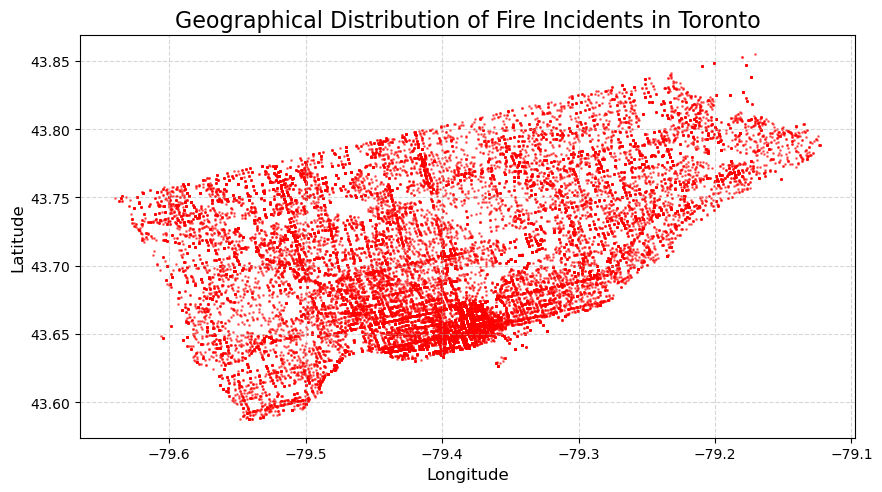

In [21]:
# Filter data to include only valid latitude and longitude for Toronto
fire_data = fire_data[
    (fire_data['Latitude'] >= 43.58) & (fire_data['Latitude'] <= 43.86) &
    (fire_data['Longitude'] >= -79.64) & (fire_data['Longitude'] <= -79.12)
]

# Create a GeoDataFrame again with valid data
geometry = [Point(xy) for xy in zip(fire_data['Longitude'], fire_data['Latitude'])]
fire_gdf = gpd.GeoDataFrame(fire_data, geometry=geometry)

# Replot the data on a blank map
fig, ax = plt.subplots(figsize=(10, 10))
fire_gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)

# Add a title and labels
plt.title('Geographical Distribution of Fire Incidents in Toronto', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


Link to Regional Municpal Boundary
https://open.toronto.ca/dataset/city-wards/

In [23]:
# Load the Toronto Shapefile
shapefile_path = 'C:/Users/Brian/Documents/Learning/UofT Data Science/Module 7/visualization/05_src/toronto_boundary_shapefile/citygcs_regional_mun_wgs84.shp'
toronto_map = gpd.read_file(shapefile_path)

print(toronto_map.head())
print(toronto_map.crs)

   AREA_ID AREA_NAME  OBJECTID  \
0    49886   Toronto  13448849   

                                            geometry  
0  POLYGON ((-79.33131 43.6258, -79.33133 43.6257...  
GEOGCS["WGS 84",DATUM["World Geodetic System 1984 [EPSG ID 6326]",SPHEROID["WGS 84 [EPSG ID 7030]",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


C:\Users\Brian\AppData\Local\Temp\ipykernel_14132\2792540891.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


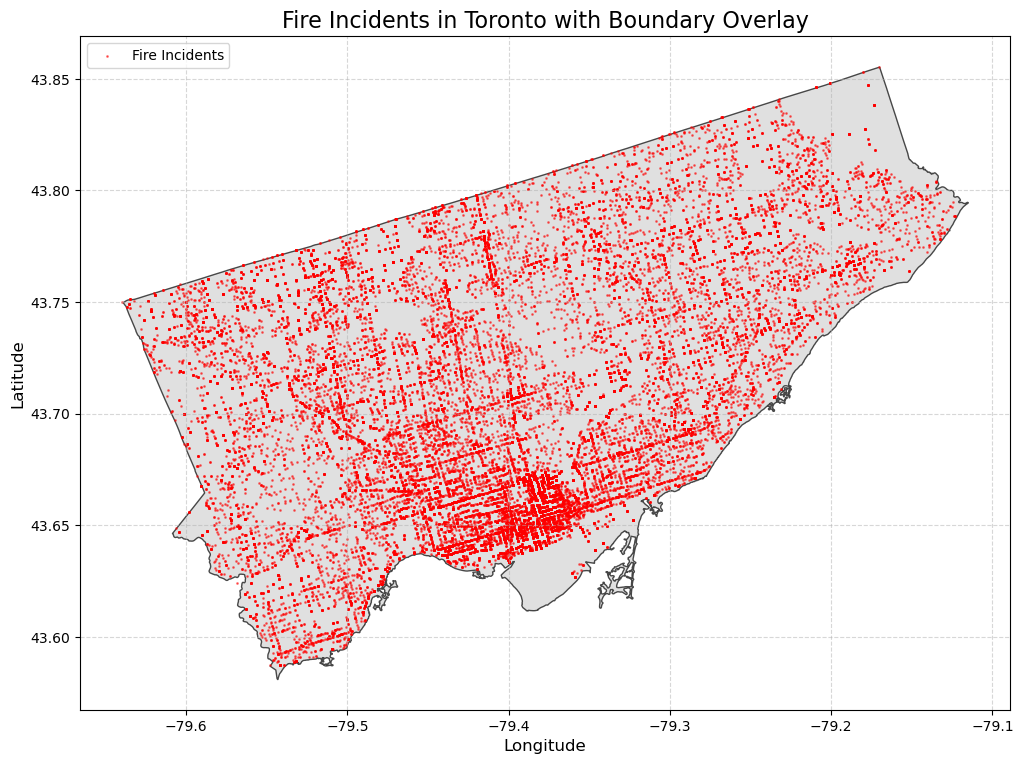

In [24]:
# Overlay Fire Incidents on the Map

# Convert fire incidents into a GeoDataFrame
geometry = [Point(xy) for xy in zip(fire_data['Longitude'], fire_data['Latitude'])]
fire_gdf = gpd.GeoDataFrame(fire_data, geometry=geometry, crs="EPSG:4326")

# Reproject fire incidents to match the shapefile's CRS
fire_gdf = fire_gdf.to_crs(toronto_map.crs)

# Plot the Toronto boundary with fire incidents
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the Toronto boundary
toronto_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7, label='Toronto Boundary')

# Plot fire incidents
fire_gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5, label='Fire Incidents')

# Add titles, labels, and legend
plt.title('Fire Incidents in Toronto with Boundary Overlay', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Link to City Wards
https://open.toronto.ca/dataset/city-wards/

In [26]:
# Load the City Wards Shapefile
wards_shapefile_path  = 'C:/Users/Brian/Documents/Learning/UofT Data Science/Module 7/visualization/05_src/toronto_city_wards/WARD_WGS84.shp'
wards_map = gpd.read_file(wards_shapefile_path)

print(wards_map.head())
print(wards_map.crs)

   AREA_ID AREA_TYPE AREA_S_CD AREA_L_CD            AREA_NAME           X  \
0  2551040      WD18        16        16      Don Valley East  318237.290   
1  2551044      WD18        03        03  Etobicoke-Lakeshore  303099.474   
2  2551048      WD18        15        15      Don Valley West  314825.876   
3  2551052      WD18        23        23    Scarborough North  324522.149   
4  2551056      WD18        11        11  University-Rosedale  313306.543   

           Y  LONGITUDE   LATITUDE  \
0  4844000.0  -79.33298  43.739716   
1  4831000.0  -79.52087  43.621646   
2  4843000.0  -79.37536  43.728396   
3  4852000.0  -79.25467  43.809672   
4  4837000.0  -79.39432  43.671139   

                                            geometry  
0  POLYGON ((-79.31335 43.71699, -79.3195 43.7156...  
1  POLYGON ((-79.49777 43.65198, -79.49725 43.651...  
2  POLYGON ((-79.35232 43.71573, -79.35209 43.715...  
3  POLYGON ((-79.22591 43.8396, -79.22556 43.8394...  
4  POLYGON ((-79.39004 43.6905, -

C:\Users\Brian\AppData\Local\Temp\ipykernel_14132\717473524.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


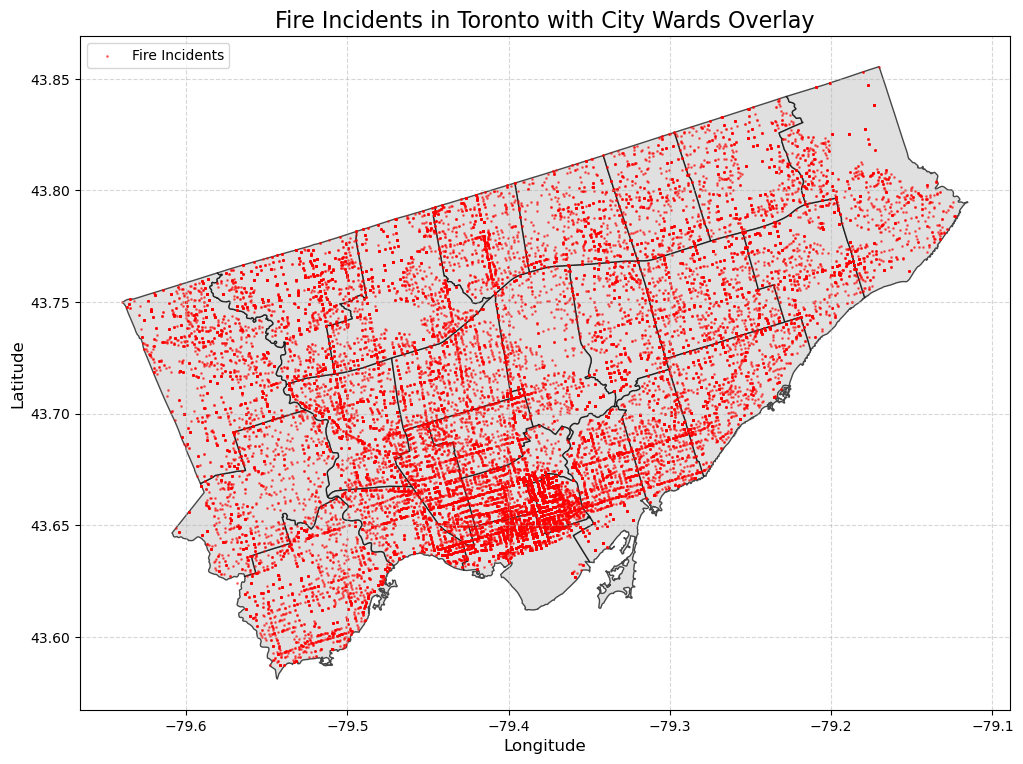

In [27]:
# Overlay Fire Incidents with Toronto City Wards 

fire_gdf = fire_gdf.to_crs(wards_map.crs)

fig, ax = plt.subplots(figsize=(12, 12))
wards_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7, label='City Wards')
fire_gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5, label='Fire Incidents')

plt.title('Fire Incidents in Toronto with City Wards Overlay', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()